In [12]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
ride_city = pd.merge(ride_data, city_data, on='city', how= 'left')

# Display the data table for preview 
ride_city.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

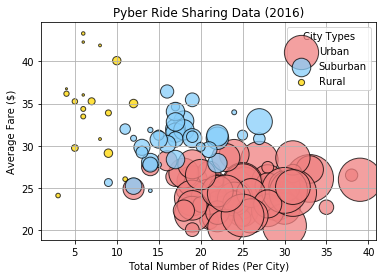

In [13]:
urban = ride_city.loc[ride_city['type'] == 'Urban']
rural = ride_city.loc[ride_city['type'] == 'Rural']
suburban = ride_city.loc[ride_city['type'] == 'Suburban']

# Obtain the x and y coordinates for each of the three city types

x_axis_urban = urban.groupby('city').ride_id.count() 
y_axis_urban = urban.groupby('city').fare.mean() 

x_axis_rural = rural.groupby('city').ride_id.count()
y_axis_rural = rural.groupby('city').fare.mean() 

x_axis_suburban = suburban.groupby('city').ride_id.count()
y_axis_suburban = suburban.groupby('city').fare.mean() 

size_urban = urban.groupby('city').driver_count.sum()
size_rural = rural.groupby('city').driver_count.sum()
size_suburban = suburban.groupby('city').driver_count.sum()

# Build the scatter plots for each city types

plt.scatter(x_axis_urban, y_axis_urban, s=size_urban, c= 'lightcoral', 
            marker = 'o', edgecolors = 'black', alpha = 0.75)
plt.scatter(x_axis_suburban, y_axis_suburban, s=size_suburban, c= 'lightskyblue', 
            marker = 'o', edgecolors = 'black', alpha = 0.75)
plt.scatter(x_axis_rural, y_axis_rural, s=size_rural, c= 'gold', 
            marker = 'o', edgecolors = 'black', alpha = 0.75)

plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')

# Create a legend
plt.legend(['Urban', 'Suburban','Rural'], title = 'City Types')
plt.grid()

# Show plot
plt.show()

## Total Fares by City Type

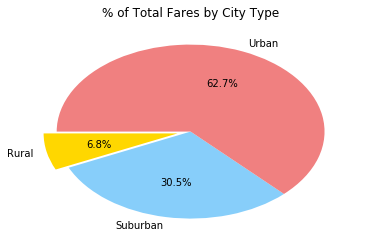

In [14]:
# Calculate Type Percents
type_grouped = ride_city.groupby('type')
total_fares_by_city_type = type_grouped['fare'].sum()
labels = ['Rural','Suburban','Urban']
colors = ['gold', 'lightskyblue', 'lightcoral']
explode = [0.1, 0, 0]
# Build Pie Chart
plt.pie(total_fares_by_city_type, explode = explode, labels = labels, colors = colors, 
        autopct = '%1.1f%%', startangle = 180)

plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("../Images/total_fares_by_city.png")
plt.show()


## Total Rides by City Type

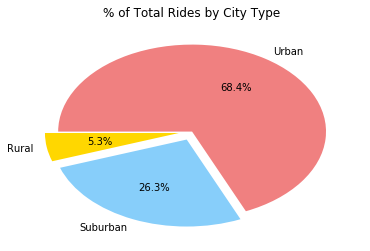

In [17]:
# Calculate Ride Percents
total_rides_by_city_type = type_grouped['ride_id'].count()
labels = ['Rural', 'Suburban', 'Urban']
colors = ['gold', 'lightskyblue', 'lightcoral']
explode = [0.1, 0.1, 0]

# Build Pie Chart
plt.pie(total_rides_by_city_type, explode = explode, labels = labels, colors = colors, 
        autopct= '%1.1f%%', startangle = 180)

plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("../Images/total_rides_by_city.png")
plt.show()

## Total Drivers by City Type

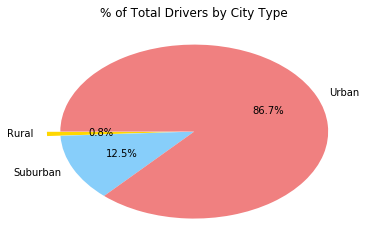

In [19]:
# Calculate Driver Percents
total_drivers_by_city_type = type_grouped['driver_count'].sum()
labels = ['Rural', 'Suburban', 'Urban']
colors = ['gold', 'lightskyblue', 'lightcoral']
explode = [0.1, 0, 0]

# Build Pie Charts
plt.pie(total_drivers_by_city_type, explode = explode, labels= labels, colors = colors, autopct = '%1.1f%%', startangle = 180)
plt.title("% of Total Drivers by City Type")
# Save Figure
plt.savefig("../Images/total_drivers_by_city.png")
plt.show()


In [20]:
# (1) a majority of drivers are concentrated in Urban areas with only a 1% of drivers in Rural areas. 
# this leads to an assumption that the public transportation is much more well-developed in urban center while car ownership 
#is much higher in rural area because of its extremely low population density. 

# (2) Rural area fares tend to be the highest on average, following by suburban and urban respectively.

# (2) while the suburban areas are a little bit longer, cost a little bit more, with fewer drivers, while rural areas have few drivers and long rides that cost more.

# (3) Suburban cities fall between rural and urban when it comes to total drivers, fare, and rides, however, both 
#rural and suburban cities combined account for less than 1/4 of the total driver count. Urban cities have higher
#population/demand so the fares can remain lower, but still make up the majority.
